## MACHINE LEARNING's project
## Kernel PCA

I'll use a Radial basis function kernel, (RBF kernel), as kernel function 

$$
    K(x,x') = exp( -(||x-x'||^2 / 2*sigma^2))
$$
$$
    K(x,x') = exp(-gamma*||x-x'||^2)
$$

## First I'll implement the RBF kernel PCA.

In [1]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

def my_kpca(X, gamma, n_components):
    """
    Arguments:
        X: A MxN dataset as NumPy array where the samples are stored as rows (M),
           and the attributes defined as columns (N).
        gamma: Parameter for the RBF kernel (1 / 2sigma^2)
        n_components: The number of components to be returned.

    """
    # Calculating the squared Euclidean distances for every pair of points in the dataset.
    euc_dist = pdist(X, 'sqeuclidean')

    # Converting the distances into a symmetric MxM matrix.
    mat_euc_dist = squareform(euc_dist)

    # Computing the MxM kernel matrix.
    K = exp(-gamma * mat_euc_dist)

    # Centering the symmetric NxN kernel matrix.
    N = K.shape[0]
    one_matrix = np.ones((N, N)) / N
    K = K - one_matrix.dot(K) - K.dot(one_matrix) + one_matrix.dot(K).dot(one_matrix)

    # Obtaining eigenvalues in descending order with corresponding eigenvectors.
    eigvals, eigvecs = eigh(K)
    
    # Obtaining the i eigenvectors that corresponds to the i highest eigenvalues.
    X_pc = np.column_stack((eigvecs[:,-i] for i in range(1, n_components + 1)))

    return X_pc

## Let's use some data.
First of all let's generate the data-set with <b>two concentric circles</b>, than let's compute the linear and the nonlinear PCA.

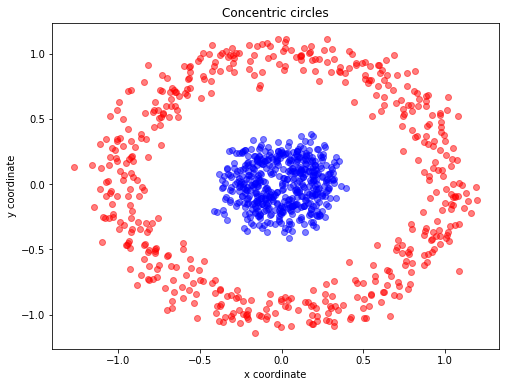

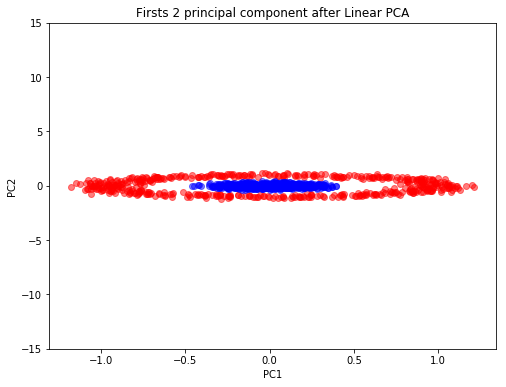

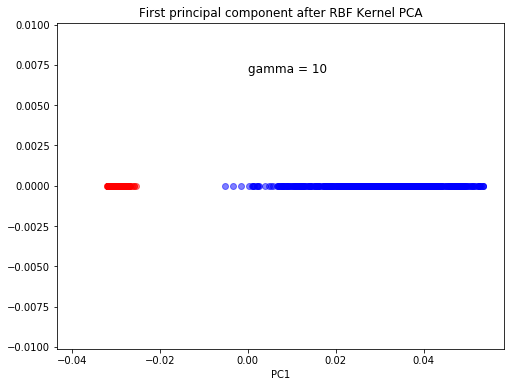

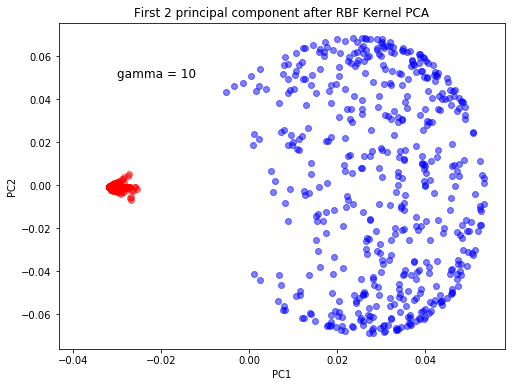

In [2]:
from sklearn.datasets import make_circles

### generate the data-set ###
X, y = make_circles(n_samples = 1000, random_state = 123, noise = .1, factor = .2)

plt.figure(figsize = (8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color = 'red', alpha = .5)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color = 'blue', alpha = .5)
plt.title('Concentric circles')
plt.ylabel('y coordinate')
plt.xlabel('x coordinate')
plt.show()

### compute the linear PCA, 1 component ###
pca = PCA(n_components = 1)
X_lpca = pca.fit_transform(X)

plt.figure(figsize = (8, 6))
plt.scatter(X_lpca[y == 0, 0], np.zeros((500, 1)) + .1, color = 'red', alpha = .5)
plt.scatter(X_lpca[y == 1, 0], np.zeros((500, 1)) - .1, color = 'blue', alpha = .5)
plt.ylim([-15, 15])
plt.title('First principal component after Linear PCA')
plt.xlabel('PC1')
plt.show()

### compute the linear PCA, 2 component ###
pca = PCA(n_components = 2)
X_lpca = pca.fit_transform(X)

plt.figure(figsize = (8, 6))
plt.scatter(X_lpca[y == 0, 0], X_lpca[y == 0, 1], color = 'red', alpha = .5)
plt.scatter(X_lpca[y == 1, 0], X_lpca[y == 1, 1], color = 'blue', alpha = .5)
plt.ylim([-15, 15])
plt.title('Firsts 2 principal component after Linear PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### compute the nonlinear PCA, 1 component ###
X_pc = my_kpca(X, gamma = 10, n_components = 2)

plt.figure(figsize=(8, 6))
plt.scatter(X_pc[y == 0, 0], np.zeros((500, 1)), color = 'red', alpha = .5)
plt.scatter(X_pc[y == 1, 0], np.zeros((500, 1)), color = 'blue', alpha = .5)
plt.text(.0, .007, 'gamma = 10', fontsize = 12)
plt.title('First principal component after RBF Kernel PCA')
plt.xlabel('PC1')
plt.show()

### compute the nonlinear PCA, 2 components ###
plt.figure(figsize=(8, 6))
plt.scatter(X_pc[y == 0, 0], X_pc[y == 0, 1], color = 'red', alpha = .5)
plt.scatter(X_pc[y == 1, 0], X_pc[y == 1, 1], color = 'blue', alpha = .5)
plt.text(-.03, .05, 'gamma = 10', fontsize = 12)
plt.title('First 2 principal component after RBF Kernel PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

## Let's try with another data-set
Now, I'll consider the <b>two-moon data-set</b>

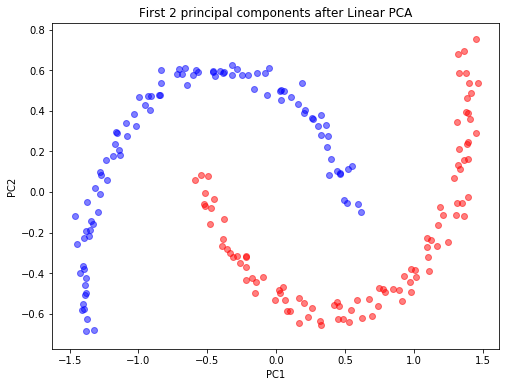

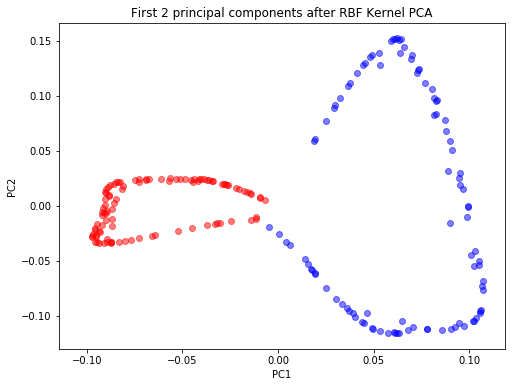

In [3]:
from sklearn.datasets import make_moons

### generate the data-set ###
X, y = make_moons(n_samples = 200, noise = .04, random_state = 123)

plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', alpha = .5)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', alpha = .5)
plt.title('A nonlinear 2Ddataset')
plt.ylabel('y coordinate')
plt.xlabel('x coordinate')
plt.show()

### linear PCA, 1 component ###
pca = PCA(n_components = 1)
X_lpca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_lpca[y == 0, 0], np.zeros((100, 1)), color='red', alpha = .5)
plt.scatter(X_lpca[y == 1, 0], np.zeros((100, 1)), color='blue', alpha = .5)
plt.title('First principal component after Linear PCA')
plt.xlabel('PC1')
plt.show()

### linear PCA, 2 components ###
pca = PCA(n_components = 2)
X_lpca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_lpca[y == 0, 0], X_lpca[y == 0, 1], color='red', alpha = .5)
plt.scatter(X_lpca[y == 1, 0], X_lpca[y == 1, 1], color='blue', alpha = .5)
plt.title('First 2 principal components after Linear PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### nonlinear PCA 1 component ###
X_pc = my_kpca(X, gamma = 13, n_components = 2) 

plt.figure(figsize=(8, 6))
plt.scatter(X_pc[y == 0, 0], np.zeros((100, 1)), color='red', alpha = .5)
plt.scatter(X_pc[y == 1, 0], np.zeros((100, 1)), color='blue', alpha = .5)
plt.title('First principal component after RBF Kernel PCA')
plt.text(.0, .007, 'gamma = 13', fontsize=12)
plt.xlabel('PC1')
plt.show()

### nonlinear PCA 2 components ###
plt.figure(figsize=(8, 6))
plt.scatter(X_pc[y == 0, 0], X_pc[y == 0, 1], color='red', alpha = .5)
plt.scatter(X_pc[y == 1, 0], X_pc[y == 1, 1], color='blue', alpha = .5)
plt.title('First 2 principal components after RBF Kernel PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()